# Read CSV data

In [10]:
import pandas as pd

rentals_df = pd.read_csv("rentals (2).csv")

In [ ]:
#Drop the first column (garbage)
rentals_df = rentals_df.drop(rentals_df.columns[0], axis=1)
rentals_df.head()

,Listing price,Verified,Updated,Bed,Bathroom,sqft,Address,listing-card__details-link href
0,$1000,Verified,Recently Updated!,1,1,1200,"30 Thunder Grove, Toronto, ON",https://rentals.ca/toronto/30-thunder-grove
1,$1250,Verified,Recently Updated!,1,2,726,"10 Deerlick Court, Toronto, ON",https://rentals.ca/toronto/10-deerlick-court-5
2,$1250,Verified,Recently Updated!,1,1,1100,"22 Wellesley Street East, Toronto, ON",https://rentals.ca/toronto/22-wellesley-street...
3,$1500,Verified,NaN,1,1,700,"60 George Butchart Drive, Toronto, ON",https://rentals.ca/toronto/60-george-butchart-...
4,$1600,NaN,NaN,1,1,1200,"1121 Bay Street, Toronto, ON",https://rentals.ca/toronto/1121-bay-street-4


In [ ]:
# Remove rows with a range of prices (eg "$1000-$1200")
rentals_df = rentals_df[~rentals_df['Listing price'].str.contains('-')]

# Remove the "$" sign and convert "Listing price" to numeric
rentals_df['Listing price'] = rentals_df['Listing price'].replace('[\$,]', '', regex=True).astype(float)
rentals_df.head(50)

<>:8: SyntaxWarning: invalid escape sequence '\$'
<>:8: SyntaxWarning: invalid escape sequence '\$'
C:\Users\NDR\AppData\Local\Temp\ipykernel_9688\3661377809.py:8: SyntaxWarning: invalid escape sequence '\$'
  rentals_df['Listing price'] = rentals_df['Listing price'].replace('[\$,]', '', regex=True).astype(float)


,Listing price,Verified,Updated,Bed,Bathroom,sqft,Address,listing-card__details-link href
0,1000.0,Verified,Recently Updated!,1,1,1200,"30 Thunder Grove, Toronto, ON",https://rentals.ca/toronto/30-thunder-grove
1,1250.0,Verified,Recently Updated!,1,2,726,"10 Deerlick Court, Toronto, ON",https://rentals.ca/toronto/10-deerlick-court-5
2,1250.0,Verified,Recently Updated!,1,1,1100,"22 Wellesley Street East, Toronto, ON",https://rentals.ca/toronto/22-wellesley-street...
3,1500.0,Verified,NaN,1,1,700,"60 George Butchart Drive, Toronto, ON",https://rentals.ca/toronto/60-george-butchart-...
4,1600.0,NaN,NaN,1,1,1200,"1121 Bay Street, Toronto, ON",https://rentals.ca/toronto/1121-bay-street-4
5,1650.0,Verified,NaN,0,0,499,"409 HURON Street, Toronto, ON",https://rentals.ca/toronto/409-huron-street-un...
6,1650.0,Verified,NaN,0,0,499,"409 HURON Street, Toronto, ON",https://rentals.ca/toronto/409-huron-street-un...
7,1700.0,NaN,1 day ago,1,1,605,"7161 Yonge Street, Markham, ON",https://rentals.ca/markham/7161-yonge-street-i...
8,1700.0,Verified,NaN,2,1,769,"28 Ted Rogers Way, Toronto, ON",https://rentals.ca/toronto/28-ted-rogers-way-i...
9,1600.0,NaN,14 hours ago,2,2,1105,"360 Watson Street West, Whitby, ON",https://rentals.ca/whitby/360-watson-street-west


In [13]:
rentals_df['Bathroom'].value_counts()

Bathroom
1        563
2        367
3         30
1.5       23
0.5       15
2.5       15
0          8
4          5
0 - 2      2
0 - 1      1
1 - 2      1
1 - 3      1
Name: count, dtype: int64

In [14]:
rentals_df['Bed'].value_counts()

Bed
2        332
1        318
1.5      229
2.5       61
3         46
0         23
0.5       12
0 - 3      3
4          3
3.5        2
0 - 2      1
7          1
Name: count, dtype: int64

As we can see, we can drop the ranges as the number is low

In [15]:
# Remove rows where 'Bathroom' contains a range
rentals_df = rentals_df[~rentals_df['Bathroom'].str.contains('-')]

# Remove rows where 'Bed' contains a range
rentals_df = rentals_df[~rentals_df['Bed'].str.contains('-')]

In [16]:
rentals_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1026 entries, 0 to 1041
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Listing price                    1026 non-null   float64
 1   Verified                         448 non-null    object 
 2   Updated                          229 non-null    object 
 3   Bed                              1026 non-null   object 
 4   Bathroom                         1026 non-null   object 
 5   sqft                             1026 non-null   object 
 6   Address                          1026 non-null   object 
 7   listing-card__details-link href  1026 non-null   object 
dtypes: float64(1), object(7)
memory usage: 72.1+ KB


## THis is the final distribution of bedrooms

In [17]:
rentals_df['Bed'].value_counts()

Bed
2      332
1      318
1.5    229
2.5     61
3       46
0       22
0.5     12
4        3
3.5      2
7        1
Name: count, dtype: int64

## Now let's see how much are in other Cities

In [20]:
# Filter rows where 'Address' contains "Mississauga"
mississauga_properties = rentals_df[rentals_df['Address'].str.contains('Mississauga', case=False, na=False)]
mississauga_properties.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79 entries, 77 to 1027
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Listing price                    79 non-null     float64
 1   Verified                         28 non-null     object 
 2   Updated                          19 non-null     object 
 3   Bed                              79 non-null     object 
 4   Bathroom                         79 non-null     object 
 5   sqft                             79 non-null     object 
 6   Address                          79 non-null     object 
 7   listing-card__details-link href  79 non-null     object 
dtypes: float64(1), object(7)
memory usage: 5.6+ KB


In [23]:
toronto_properties = rentals_df[rentals_df['Address'].str.contains('Etobicoke', case=False, na=False)]
toronto_properties.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 278 to 1035
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Listing price                    10 non-null     float64
 1   Verified                         2 non-null      object 
 2   Updated                          2 non-null      object 
 3   Bed                              10 non-null     object 
 4   Bathroom                         10 non-null     object 
 5   sqft                             10 non-null     object 
 6   Address                          10 non-null     object 
 7   listing-card__details-link href  10 non-null     object 
dtypes: float64(1), object(7)
memory usage: 720.0+ bytes


In [24]:
# Extract city/zone by splitting the 'Address' column (assuming the city is the second-last segment in the address)
rentals_df['City/Zone'] = rentals_df['Address'].str.split(',').str[-2].str.strip()

# Get unique cities/zones
unique_cities = rentals_df['City/Zone'].unique()

# Display unique cities/zones
print("Unique cities/zones:")
print(unique_cities)

# Optionally, count occurrences of each city/zone
city_counts = rentals_df['City/Zone'].value_counts()
print("\nCount of each city/zone:")
print(city_counts)


Unique cities/zones:
['Toronto' 'Markham' 'Whitby' 'Vaughan' 'East York' 'Brampton'
 'Scarborough' 'Pickering' 'Mississauga' 'North York' 'Oakville' 'York'
 'Etobicoke' 'Richmond Hill' 'Aurora']

Count of each city/zone:
City/Zone
Toronto          711
Mississauga       79
Oakville          79
Vaughan           43
Markham           21
North York        21
Richmond Hill     21
Brampton          12
Scarborough       10
Etobicoke         10
Pickering          8
York               4
East York          3
Whitby             2
Aurora             2
Name: count, dtype: int64


We will only consider the following zones as part of Toronto or its immediate neighborhoods (based on common geographical and municipal divisions):

- Toronto
- North York - A district within Toronto.
- Scarborough - A district within Toronto.
- Etobicoke - A district within Toronto.
- York - A district within Toronto.
- East York - A district within Toronto.

Let's drop everything else!

In [27]:
# Define the list of zones considered as Toronto
toronto_zones = ['Toronto', 'North York', 'Scarborough', 'Etobicoke', 'York', 'East York']

# Filter the DataFrame to keep only rows with 'City/Zone' in the Toronto zones
toronto_properties = rentals_df[rentals_df['City/Zone'].isin(toronto_zones)]

# Display the filtered DataFrame
toronto_properties.info()

# # Optionally, save the filtered data to a CSV file
# toronto_properties.to_csv('toronto_properties.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
Index: 759 entries, 0 to 1041
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Listing price                    759 non-null    float64
 1   Verified                         308 non-null    object 
 2   Updated                          169 non-null    object 
 3   Bed                              759 non-null    object 
 4   Bathroom                         759 non-null    object 
 5   sqft                             759 non-null    object 
 6   Address                          759 non-null    object 
 7   listing-card__details-link href  759 non-null    object 
 8   City/Zone                        759 non-null    object 
dtypes: float64(1), object(8)
memory usage: 59.3+ KB


In [28]:
df = toronto_properties
df.head()

,Listing price,Verified,Updated,Bed,Bathroom,sqft,Address,listing-card__details-link href,City/Zone
0,1000.0,Verified,Recently Updated!,1,1,1200,"30 Thunder Grove, Toronto, ON",https://rentals.ca/toronto/30-thunder-grove,Toronto
1,1250.0,Verified,Recently Updated!,1,2,726,"10 Deerlick Court, Toronto, ON",https://rentals.ca/toronto/10-deerlick-court-5,Toronto
2,1250.0,Verified,Recently Updated!,1,1,1100,"22 Wellesley Street East, Toronto, ON",https://rentals.ca/toronto/22-wellesley-street...,Toronto
3,1500.0,Verified,NaN,1,1,700,"60 George Butchart Drive, Toronto, ON",https://rentals.ca/toronto/60-george-butchart-...,Toronto
4,1600.0,NaN,NaN,1,1,1200,"1121 Bay Street, Toronto, ON",https://rentals.ca/toronto/1121-bay-street-4,Toronto


## Geocoding to get the new dataset 
- I will use the Google Maps API
- I put it in a commentary because I need the code only once
- I also don't want to run a lot of times, because google has My credit card, and if I surpass certain number of queries, they will start to charge me automatically

In [ ]:
# THE ONE THAT FINALLY WORKED

# import pandas as pd
# from geopy.geocoders import GoogleV3

# # Google Maps API key
# api_key = "MY SECRET API KEY"

# # Initialize the geolocator with Google Maps API
# geolocator = GoogleV3(api_key=api_key)

# # # Load the CSV file
# # input_file = "TRREB_data_cleaned.csv"  # Update with your actual file path
# output_file = "rentals_with_LAT_LONG.csv"  # Output file path
# # df = pd.read_csv(input_file)

# df = toronto_properties

# # Initialize columns for latitude and longitude
# df['LAT'] = None
# df['LONG'] = None

# # Geocode each address
# for index, row in df.iterrows():
#     try:
#         # Geocode the address
#         location = geolocator.geocode(row['Address'], timeout=10)
#         # Extract latitude and longitude
#         if location:
#             df.loc[index, 'LAT'] = location.latitude
#             df.loc[index, 'LONG'] = location.longitude
#             print(f"Geocoded: {row['Address']} -> LAT: {location.latitude}, LONG: {location.longitude}")
#         else:
#             print(f"Address not found: {row['Address']}")
#             df.loc[index, 'LAT'] = None
#             df.loc[index, 'LONG'] = None
#     except Exception as e:
#         print(f"Error geocoding Address: {row['Address']} - {e}")
#         df.loc[index, 'LAT'] = None
#         df.loc[index, 'LONG'] = None

# # Save the DataFrame with LAT and LONG columns
# df.to_csv(output_file, index=False)
# print(f"Geocoding completed. Results saved to {output_file}")


C:\Users\NDR\AppData\Local\Temp\ipykernel_9688\915123732.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LAT'] = None
C:\Users\NDR\AppData\Local\Temp\ipykernel_9688\915123732.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LONG'] = None


Geocoded: 30 Thunder Grove, Toronto, ON -> LAT: 43.8095841, LONG: -79.2663287
Geocoded: 10 Deerlick Court, Toronto, ON -> LAT: 43.7591964, LONG: -79.33192380000001
Geocoded: 22 Wellesley Street East, Toronto, ON -> LAT: 43.6654816, LONG: -79.3832754
Geocoded: 60 George Butchart Drive, Toronto, ON -> LAT: 43.7360717, LONG: -79.4837927
Geocoded: 1121 Bay Street, Toronto, ON -> LAT: 43.6679864, LONG: -79.3885486
Geocoded: 409 HURON Street, Toronto, ON -> LAT: 43.6665833, LONG: -79.4009537
Geocoded: 409 HURON Street, Toronto, ON -> LAT: 43.6665833, LONG: -79.4009537
Geocoded: 28 Ted Rogers Way, Toronto, ON -> LAT: 43.6707118, LONG: -79.38052429999999
Geocoded: 56 Annie Craig Drive, Toronto, ON -> LAT: 43.6254787, LONG: -79.4788159
Geocoded: 3237 Bayview Avenue, Toronto, ON -> LAT: 43.7899719, LONG: -79.3926166
Geocoded: 2020 Bathurst St, Toronto, ON -> LAT: 43.70078609999999, LONG: -79.4256293
Geocoded: 28 Wellesley Street East, Toronto, ON -> LAT: 43.6655834, LONG: -79.3827749
Geocoded: 2

Let's format a LAT, LONG and address

In [ ]:
# Add LAT LONG and address
rentals_df = pd.read_csv('rentals_with_LAT_LONG.csv')
rentals_df.head()



,Listing price,Verified,Updated,Bed,Bathroom,sqft,Address,listing-card__details-link href,City/Zone,LAT,LONG
0,1000.0,Verified,Recently Updated!,1.0,1.0,1200,"30 Thunder Grove, Toronto, ON",https://rentals.ca/toronto/30-thunder-grove,Toronto,43.809584,-79.266329
1,1250.0,Verified,Recently Updated!,1.0,2.0,726,"10 Deerlick Court, Toronto, ON",https://rentals.ca/toronto/10-deerlick-court-5,Toronto,43.759196,-79.331924
2,1250.0,Verified,Recently Updated!,1.0,1.0,1100,"22 Wellesley Street East, Toronto, ON",https://rentals.ca/toronto/22-wellesley-street...,Toronto,43.665482,-79.383275
3,1500.0,Verified,NaN,1.0,1.0,700,"60 George Butchart Drive, Toronto, ON",https://rentals.ca/toronto/60-george-butchart-...,Toronto,43.736072,-79.483793
4,1600.0,NaN,NaN,1.0,1.0,1200,"1121 Bay Street, Toronto, ON",https://rentals.ca/toronto/1121-bay-street-4,Toronto,43.667986,-79.388549


In [31]:
rentals_df.rename(columns={'Address': 'address'}, inplace=True)
rentals_df.head()

,Listing price,Verified,Updated,Bed,Bathroom,sqft,address,listing-card__details-link href,City/Zone,LAT,LONG
0,1000.0,Verified,Recently Updated!,1.0,1.0,1200,"30 Thunder Grove, Toronto, ON",https://rentals.ca/toronto/30-thunder-grove,Toronto,43.809584,-79.266329
1,1250.0,Verified,Recently Updated!,1.0,2.0,726,"10 Deerlick Court, Toronto, ON",https://rentals.ca/toronto/10-deerlick-court-5,Toronto,43.759196,-79.331924
2,1250.0,Verified,Recently Updated!,1.0,1.0,1100,"22 Wellesley Street East, Toronto, ON",https://rentals.ca/toronto/22-wellesley-street...,Toronto,43.665482,-79.383275
3,1500.0,Verified,NaN,1.0,1.0,700,"60 George Butchart Drive, Toronto, ON",https://rentals.ca/toronto/60-george-butchart-...,Toronto,43.736072,-79.483793
4,1600.0,NaN,NaN,1.0,1.0,1200,"1121 Bay Street, Toronto, ON",https://rentals.ca/toronto/1121-bay-street-4,Toronto,43.667986,-79.388549


# Now let's try to add neighbourhoods and get the final version

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Configure Notebook
%matplotlib inline 
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

The final version of the DF will be rentals_final

In [36]:
rentals_final = rentals_df
rentals_final.head()

,Listing price,Verified,Updated,Bed,Bathroom,sqft,address,listing-card__details-link href,City/Zone,LAT,LONG
0,1000.0,Verified,Recently Updated!,1.0,1.0,1200,"30 Thunder Grove, Toronto, ON",https://rentals.ca/toronto/30-thunder-grove,Toronto,43.809584,-79.266329
1,1250.0,Verified,Recently Updated!,1.0,2.0,726,"10 Deerlick Court, Toronto, ON",https://rentals.ca/toronto/10-deerlick-court-5,Toronto,43.759196,-79.331924
2,1250.0,Verified,Recently Updated!,1.0,1.0,1100,"22 Wellesley Street East, Toronto, ON",https://rentals.ca/toronto/22-wellesley-street...,Toronto,43.665482,-79.383275
3,1500.0,Verified,NaN,1.0,1.0,700,"60 George Butchart Drive, Toronto, ON",https://rentals.ca/toronto/60-george-butchart-...,Toronto,43.736072,-79.483793
4,1600.0,NaN,NaN,1.0,1.0,1200,"1121 Bay Street, Toronto, ON",https://rentals.ca/toronto/1121-bay-street-4,Toronto,43.667986,-79.388549


Neighbourhood adding and mapping

In [37]:
# Load the shapefile (use the path to the .shp file)
neighbourhoods = gpd.read_file('Neighbourhoods - 4326.shp')

In [38]:
# Perform a spatial join to add the neighborhood name (from AREA_NA7) to each apartment
geometry = [Point(xy) for xy in zip(rentals_final['LONG'], rentals_final['LAT'])]
rentals_final = gpd.GeoDataFrame(rentals_final, geometry=geometry, crs='EPSG:4326')
joined_df = gpd.sjoin(rentals_final, neighbourhoods, how="left", predicate="within")

# Assign the neighborhood name from AREA_NA7 to a new column in the filtered DataFrame
rentals_final['Neighbourhood'] = joined_df['AREA_NA7']

In [39]:
# Define the neighborhood ranking as a dictionary
neighbourhood_ranking = {
    'Danforth': 1,
    'West Queen West': 2,
    'Runnymede-Bloor West Village': 3,
    'Avondale': 4,
    'Wellington Place': 5,
    'Yonge-Doris': 6,
    'Cabbagetown-South St.James Town': 7,
    'Bay-Cloverhill': 8,
    'Palmerston-Little Italy': 9,
    'Trinity-Bellwoods': 10,
    'Bridle Path-Sunnybrook-York Mills': 11,
    'Annex': 12,
    'North Riverdale': 13,
    'Mount Pleasant East': 14,
    'Lawrence Park North': 15,
    'Kingsway South': 16,
    'University': 17,
    'Yonge-Bay Corridor': 18,
    'Leaside-Bennington': 19,
    'South Eglinton-Davisville': 20,
    'Harbourfront-CityPlace': 21,
    'Wychwood': 22,
    'Dovercourt Village': 23,
    'Blake-Jones': 24,
    'Roncesvalles': 25,
    'Dufferin Grove': 26,
    'Lawrence Park South': 27,
    'Church-Wellesley': 28,
    'Casa Loma': 29,
    'Woodbine-Lumsden': 30,
    'Danforth East York': 31,
    'Regent Park': 32,
    'Lansing-Westgate': 33,
    'Downtown Yonge East': 34,
    'St Lawrence-East Bayfront-The Islands': 35,
    'Yonge-Eglinton': 36,
    'High Park-Swansea': 37,
    'Little Portugal': 38,
    'Forest Hill South': 39,
    'Playter Estates-Danforth': 40,
    'Junction Area': 41,
    'Woodbine Corridor': 42,
    'The Beaches': 43,
    'Rosedale-Moore Park': 44,
    'Old East York': 45,
    'Bedford Park-Nortown': 46,
    'High Park North': 47,
    'Kensington-Chinatown': 48,
    'Yonge-St.Clair': 49,
    'Junction-Wallace Emerson': 50,
    'Princess-Rosethorn': 51,
    'Fort York-Liberty Village': 52,
    'North St.James Town': 53,
    'Willowdale West': 54,
    'North Toronto': 55,
    'Greenwood-Coxwell': 56,
    'Bayview Village': 57,
    'South Riverdale': 58,
    'Humewood-Cedarvale': 59,
    'East End-Danforth': 60,
    'Taylor-Massey': 61,
    'East Willowdale': 62,
    'Corso Italia-Davenport': 63,
    'Etobicoke City Centre': 64,
    'Stonegate-Queensway': 65,
    'Centennial Scarborough': 66,
    'Hillcrest Village': 67,
    'Humber Bay Shores': 68,
    'Moss Park': 69,
    'Broadview North': 70,
    'Morningside Heights': 71,
    'Lambton Baby Point': 72,
    'Newtonbrook East': 73,
    'Malvern West': 74,
    'Forest Hill North': 75,
    'Clanton Park': 76,
    'Pleasant View': 77,
    'Banbury-Don Mills': 78,
    'Malvern East': 79,
    'Islington': 80,
    'Markland Wood': 81,
    'Highland Creek': 82,
    'Agincourt North': 83,
    'Edenbridge-Humber Valley': 84,
    'East L\'Amoreaux': 85,
    'Alderwood': 86,
    'Milliken': 87,
    'Henry Farm': 88,
    'Steeles': 89,
    'St.Andrew-Windfields': 90,
    'Pelmo Park-Humberlea': 91,
    'Guildwood': 92,
    'Oakwood Village': 93,
    'Agincourt South-Malvern West': 94,
    'Birchcliffe-Cliffside': 95,
    'Clairlea-Birchmount': 96,
    'Englemount-Lawrence': 97,
    'West Rouge': 98,
    'Tam O\'Shanter-Sullivan': 99,
    'Briar Hill-Belgravia': 100,
    'Bayview Woods-Steeles': 101,
    'Weston-Pelham Park': 102,
    'Bathurst Manor': 103,
    'Woburn North': 104,
    'Bendale South': 105,
    'Newtonbrook West': 106,
    'L\'Amoreaux West': 107,
    'Eringate-Centennial-West Deane': 108,
    'Flemingdon Park': 109,
    'Westminster-Branson': 110,
    'Don Valley Village': 111,
    'Long Branch': 112,
    'Caledonia-Fairbank': 113,
    'Humber Heights-Westmount': 114,
    'Parkwoods-O\'Connor Hills': 115,
    'Rockcliffe-Smythe': 116,
    'Thistletown-Beaumond Heights': 117,
    'Keelesdale-Eglinton West': 118,
    'Maple Leaf': 119,
    'O\'Connor-Parkview': 120,
    'Etobicoke West Mall': 121,
    'Morningside': 122,
    'Mimico-Queensway': 123,
    'Bendale-Glen Andrew': 124,
    'Oakridge': 125,
    'Dorset Park': 126,
    'Thorncliffe Park': 127,
    'Wexford/Maryvale': 128,
    'Victoria Village': 129,
    'Elms-Old Rexdale': 130,
    'Cliffcrest': 131,
    'Humbermede': 132,
    'Mount Dennis': 133,
    'Ionview': 134,
    'Willowridge-Martingrove-Richview': 135,
    'Downsview': 136,
    'Kingsview Village-The Westway': 137,
    'Eglinton East': 138,
    'Fenside-Parkwoods': 139,
    'Yorkdale-Glen Park': 140,
    'Mount Olive-Silverstone-Jamestown': 141,
    'West Humber-Clairville': 142,
    'Glenfield-Jane Heights': 143,
    'South Parkdale': 144,
    'York University Heights': 145,
    'New Toronto': 146,
    'Golfdale-Cedarbrae-Woburn': 147,
    'Brookhaven-Amesbury': 148,
    'Rexdale-Kipling': 149,
    'Rustic': 150,
    'Humber Summit': 151,
    'Scarborough Village': 152,
    'Beechborough-Greenbrook': 153,
    'Oakdale-Beverley Heights': 154,
    'Weston': 155,
    'West Hill': 156,
    'Black Creek': 157,
    'Kennedy Park': 158
}

# Map the ranks to the 'Neighbourhood' column in filtered_gdf
rentals_final['Neighbourhood Rank'] = rentals_final['Neighbourhood'].map(neighbourhood_ranking)

In [40]:
rentals_final.head()

,Listing price,Verified,Updated,Bed,Bathroom,sqft,address,listing-card__details-link href,City/Zone,LAT,LONG,geometry,Neighbourhood,Neighbourhood Rank
0,1000.0,Verified,Recently Updated!,1.0,1.0,1200,"30 Thunder Grove, Toronto, ON",https://rentals.ca/toronto/30-thunder-grove,Toronto,43.809584,-79.266329,POINT (-79.266 43.81),Agincourt North,83.0
1,1250.0,Verified,Recently Updated!,1.0,2.0,726,"10 Deerlick Court, Toronto, ON",https://rentals.ca/toronto/10-deerlick-court-5,Toronto,43.759196,-79.331924,POINT (-79.332 43.759),Fenside-Parkwoods,139.0
2,1250.0,Verified,Recently Updated!,1.0,1.0,1100,"22 Wellesley Street East, Toronto, ON",https://rentals.ca/toronto/22-wellesley-street...,Toronto,43.665482,-79.383275,POINT (-79.383 43.665),Church-Wellesley,28.0
3,1500.0,Verified,NaN,1.0,1.0,700,"60 George Butchart Drive, Toronto, ON",https://rentals.ca/toronto/60-george-butchart-...,Toronto,43.736072,-79.483793,POINT (-79.484 43.736),Downsview,136.0
4,1600.0,NaN,NaN,1.0,1.0,1200,"1121 Bay Street, Toronto, ON",https://rentals.ca/toronto/1121-bay-street-4,Toronto,43.667986,-79.388549,POINT (-79.389 43.668),Bay-Cloverhill,8.0


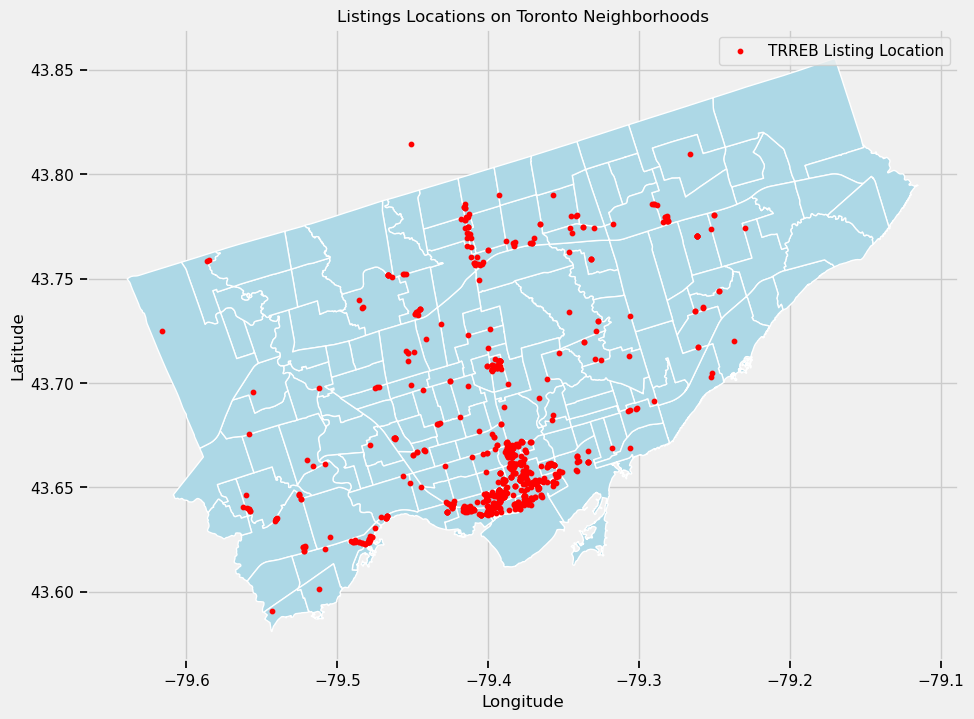

In [41]:
# Plot neighborhoods
fig, ax = plt.subplots(figsize=(10, 10))
neighbourhoods.plot(ax=ax, color='lightblue', edgecolor='white')

# Plot listings' locations
plt.scatter(rentals_final['LONG'],rentals_final['LAT'], color='red', s=10, label="TRREB Listing Location")

# Add labels and legend
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.title("Listings Locations on Toronto Neighborhoods")

plt.show()

The Final Version is rentals_data_final.csv

In [42]:
# Let's export the final .csv

# file name
output_file = "rentals_data_final.csv"

# Export the DataFrame to a CSV file
rentals_final.to_csv(output_file, index=False)  # index=False prevents writing row numbers as a column

print(f"DataFrame successfully exported to {output_file}")

DataFrame successfully exported to rentals_data_final.csv
